In [41]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
import os

# Setting the file path for clinical trial data file
clinical_data_path = os.path.join("raw_data","clinicaltrial_data.csv") 
# Setting the file path for mouse drug data file
mouse_drug_data_path = os.path.join("raw_data","mouse_drug_data.csv")

# Reading the csv files
clinical_data = pd.read_csv(clinical_data_path)
mouse_drug_data = pd.read_csv(mouse_drug_data_path)

# Combining the data files to one single dataframe
clinical_combined_data = pd.merge(clinical_data, mouse_drug_data, on="Mouse ID", how="left")

clinical_combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


# Tumor Response to Treatment

In [28]:
# Creating a pivot table to summarize our data
# Here we can see the average tumor volume per time point for each drug
tumor_response_pivot = pd.pivot_table(clinical_combined_data, index=["Timepoint"], values="Tumor Volume (mm3)", columns=["Drug"], aggfunc=np.mean)
tumor_response_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [33]:
# Droping the not needed drugs from the already existing pivot table
cleaned_tumor_response_pivot = tumor_response_pivot.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], 
                                                         axis=1)
cleaned_tumor_response_pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


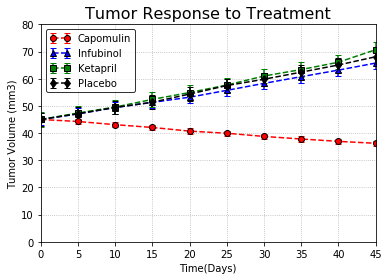

In [39]:
# Setting the lists of drugs, colors and markers respectively
drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["red","blue","green","black"]
markers=["o","^","s","d"]

# Intializing the plots
fig, ax = plt.subplots()

for drug in drugs:
    # Setting the x_axis data,y_axis data and standard error of the mean for the graph
    x_data=cleaned_tumor_response_pivot.index.values
    y_data=cleaned_tumor_response_pivot[drug] 
    err=sem(cleaned_tumor_response_pivot[drug])
    
    # Finding the index of each drug to get its respective color and marker
    index=drugs.index(drug)
    # Setting up the plot
    ax.errorbar(x_data, y_data,err,linestyle="--",color=colors[index],
                marker=markers[index],capsize=3,capthick=1,markeredgecolor='black')
    # Setting the legend
    ax.legend(loc="upper left", fancybox=True,numpoints=2,edgecolor="black")

# Setting the grid   
plt.grid(linestyle='dotted')
# Setting the x_axis and y_axis limits
ax.set_xlim(0,45)
ax.set_ylim(0,80)
# Setting the title,x_axis and y_axis labels
ax.set_title("Tumor Response to Treatment", fontsize=16)
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume (mm3)")

# Display the graph
plt.show()

# Metastatic Response to Treatment

In [43]:
# Creating a pivot table for Metastatic Response and dropping the not needed drugs 
# Here we can see the average number of metastaic sites per time point for each drug
metastatic_response_pivot = pd.pivot_table(clinical_combined_data, index=["Timepoint"], values="Metastatic Sites", 
                                           columns=["Drug"], aggfunc=np.mean)
cleaned_ms_response_pivot = metastatic_response_pivot.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], 
                                                         axis=1)
cleaned_ms_response_pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


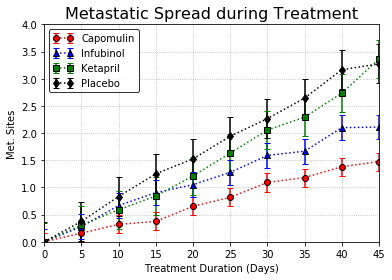

In [45]:
# Setting the lists of drugs, colors and markers respectively
drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["red","blue","green","black"]
markers=["o","^","s","d"]

# Intializing the plots
fig, ax = plt.subplots()

for drug in drugs:
    # Setting the x_axis data,y_axis data and standard error of the mean for the graph
    x_data=cleaned_ms_response_pivot.index.values
    y_data=cleaned_ms_response_pivot[drug] 
    err=sem(cleaned_ms_response_pivot[drug])
    
    # Finding the index of each drug to get its respective color and marker
    index=drugs.index(drug)
    # Setting up the plot
    ax.errorbar(x_data, y_data,err,linestyle=":",color=colors[index],
                marker=markers[index],capsize=3,capthick=1,markeredgecolor='black')
    # Setting the legend
    ax.legend(loc="upper left", fancybox=True,numpoints=2,edgecolor="black")
    
# Setting the grid     
plt.grid(linestyle='dotted')
# Setting the x_axis and y_axis limits
ax.set_xlim(0,45)
ax.set_ylim(0,4)
# Setting the title,x_axis and y_axis labels
ax.set_title("Metastatic Spread during Treatment", fontsize=16)
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")

# Display the graph
plt.show()